In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os


In [29]:
RCMIP = pd.read_csv('RCMIP_combined.csv',low_memory=False)

## Check RCMIP Data

In [30]:
def visualize_rcmip_data(file_path, 
                         variables=None, 
                         scenarios=None, 
                         year_range=(1900, 2100),
                         region='World',
                         exclude_models=None,
                         exclude_scenarios=None,
                         compare_by='ClimateModel+Scenario',
                         plot_title=None,
                         figsize=(12, 6)):
    """
    Read and visualize RCMIP data with customizable parameters.
    
    Parameters:
    -----------
    file_path : str
        Path to the RCMIP CSV file
    variables : list or str, optional
        List of variables to include, or single variable string. 
        If None, includes all variables
    scenarios : list or str, optional
        List of scenarios to include, or single scenario string.
        If None, includes all scenarios
    year_range : tuple, optional
        (start_year, end_year) for filtering data. Default (1900, 2100)
    region : str, optional
        Region to filter by. Default 'World'
    exclude_models : list, optional
        List of model names to exclude from visualization
    exclude_scenarios : list, optional
        List of scenario names to exclude from visualization
    compare_by : str, optional
        How to group data for comparison: 'ClimateModel', 'Scenario', or 'ClimateModel+Scenario'
    plot_title : str, optional
        Custom title for the plot. If None, auto-generated
    figsize : tuple, optional
        Figure size (width, height). Default (12, 6)
    
    Returns:
    --------
    df_filtered : pandas.DataFrame
        The filtered DataFrame used for plotting
    """
    
    # Read the CSV file
    print(f"Reading data from: {file_path}")
    df = pd.read_csv(file_path)
    print(f"Original data shape: {df.shape}")
    
    # Apply variable filter
    if variables is not None:
        if isinstance(variables, str):
            variables = [variables]
        df = df[df['Variable'].isin(variables)]
        print(f"After variable filtering: {df.shape}")
    
    # Apply scenario filter
    if scenarios is not None:
        if isinstance(scenarios, str):
            scenarios = [scenarios]
        df = df[df['Scenario'].isin(scenarios)]
        print(f"After scenario filtering: {df.shape}")
    
    # Apply region filter
    if region is not None:
        df = df[df['Region'] == region]
        print(f"After region filtering: {df.shape}")
    
    # Apply year range filter
    start_year, end_year = year_range
    year_columns = [str(year) for year in range(start_year, end_year + 1)]
    identifier_columns = ['ClimateModel', 'Scenario', 'Region', 'Variable', 'Unit']
    
    # Only keep columns that exist in the DataFrame
    columns_to_keep = [col for col in identifier_columns if col in df.columns] + \
                      [col for col in year_columns if col in df.columns]
    
    df = df[columns_to_keep]
    print(f"After year range filtering: {df.shape}")
    
    # Apply exclusion filters
    if exclude_models is not None:
        df = df[~df['ClimateModel'].isin(exclude_models)]
        print(f"After excluding models: {df.shape}")
    
    if exclude_scenarios is not None:
        df = df[~df['Scenario'].isin(exclude_scenarios)]
        print(f"After excluding scenarios: {df.shape}")
    
    # Create the plot
    plt.figure(figsize=figsize)
    
    # Get year columns for plotting
    year_cols = [col for col in df.columns if col.isdigit()]
    years = [int(col) for col in year_cols]
    
    # Group by the specified comparison method
    if compare_by == 'ClimateModel+Scenario':
        df['ClimateModel+Scenario'] = df['ClimateModel'] + ' | ' + df['Scenario']
        group_col = 'ClimateModel+Scenario'
    else:
        group_col = compare_by
    
    # Plot each group
    offset = (years[-1] - years[0]) * 0.01
    colors = plt.cm.tab20(np.linspace(0, 1, len(df[group_col].unique())))
    
    for i, (key, grp) in enumerate(df.groupby(group_col)):
        y = grp[year_cols].values.squeeze()
        
        if y.ndim == 1:
            mask = ~pd.isna(y)
            if mask.any():
                plt.plot(np.array(years)[mask], y[mask], 
                        color=colors[i % len(colors)], 
                        linewidth=1.5, alpha=0.8)
                last_valid_idx = np.where(mask)[0][-1]
                plt.text(years[last_valid_idx] + offset, y[last_valid_idx], 
                        str(key), fontsize=8, va='center')
        else:
            for row in y:
                mask = ~pd.isna(row)
                if mask.any():
                    plt.plot(np.array(years)[mask], row[mask], 
                            color=colors[i % len(colors)], 
                            linewidth=1.5, alpha=0.8)
                    last_valid_idx = np.where(mask)[0][-1]
                    plt.text(years[last_valid_idx] + offset, row[last_valid_idx], 
                            str(key), fontsize=8, va='center')
    
    # Customize the plot
    plt.xlabel('Year', fontsize=12)
    
    # Get variable name for y-label
    if variables is not None and len(variables) == 1:
        ylabel = variables[0]
    else:
        ylabel = "Variable Value"
    
    # Add unit if available
    if 'Unit' in df.columns and not df['Unit'].empty:
        unit = df['Unit'].iloc[0]
        ylabel += f" ({unit})"
    
    plt.ylabel(ylabel, fontsize=12)
    
    # Set title
    if plot_title is None:
        plot_title = f"RCMIP Data Visualization\n{compare_by} Comparison"
    plt.title(plot_title, fontsize=14, pad=20)
    
    # Add grid and remove spines
    plt.grid(True, which='both', linestyle='--', linewidth=0.5, 
             color='lightgray', alpha=0.7)
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    
    # Extend x-axis for labels
    plt.xlim(years[0], years[-1] + 5 * offset)
    
    plt.tight_layout()
    plt.show()
    
    return df


Reading data from: RCMIP_combined.csv


C:\Users\tanryan\AppData\Local\Temp\ipykernel_26240\1898382005.py:47: DtypeWarning: Columns (106) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Original data shape: (23444, 1408)
After variable filtering: (418, 1408)
After scenario filtering: (20, 1408)
After region filtering: (20, 1408)
After year range filtering: (20, 16)


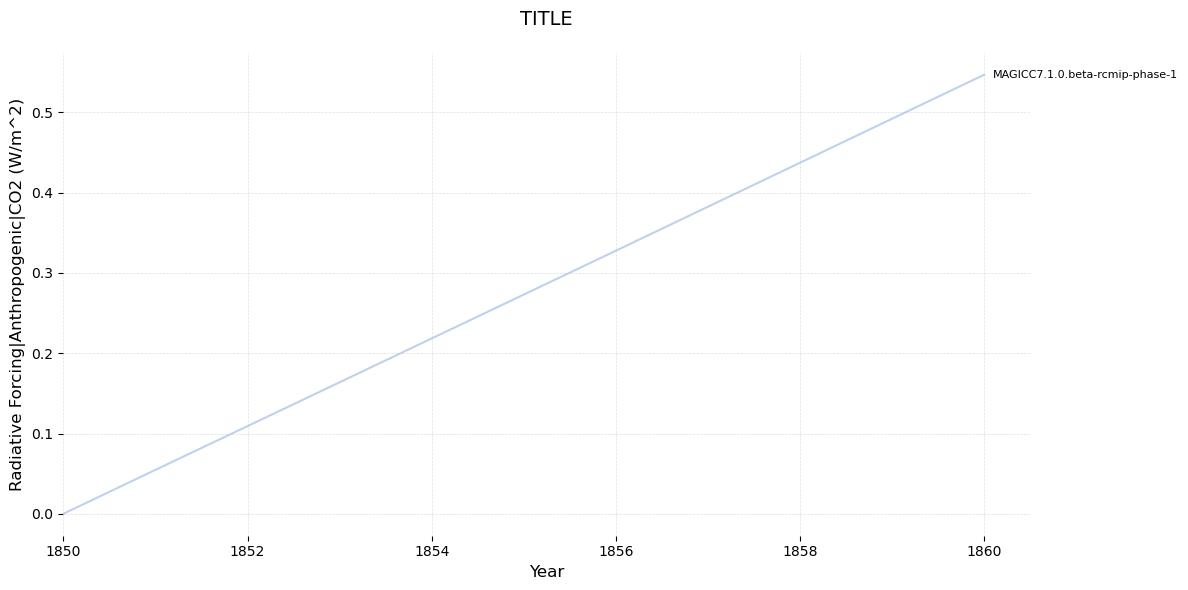

,ClimateModel,Scenario,Region,Variable,Unit,1850,1851,1852,1853,1854,1855,1856,1857,1858,1859,1860
1465,ACC2 | version 4.2,1pctCO2-4xext,World,Radiative Forcing|Anthropogenic|CO2,W/m^2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2072,hector|1d51f|CMIP6-CESM2-WACCM-CALIB,1pctCO2-4xext,World,Radiative Forcing|Anthropogenic|CO2,W/m^2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2091,hector|1d51f|CMIP6-CESM2-CALIB,1pctCO2-4xext,World,Radiative Forcing|Anthropogenic|CO2,W/m^2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2110,hector|1d51f|CMIP6-CNRM-CM6-1-CALIB,1pctCO2-4xext,World,Radiative Forcing|Anthropogenic|CO2,W/m^2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2129,hector|1d51f|CMIP6-CNRM-ESM2-1-CALIB,1pctCO2-4xext,World,Radiative Forcing|Anthropogenic|CO2,W/m^2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2148,hector|1d51f|CMIP6-CanESM5-CALIB,1pctCO2-4xext,World,Radiative Forcing|Anthropogenic|CO2,W/m^2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2167,hector|1d51f|CMIP6-IPSL-CM6A-LR-CALIB,1pctCO2-4xext,World,Radiative Forcing|Anthropogenic|CO2,W/m^2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2186,hector|1d51f|DEFAULT,1pctCO2-4xext,World,Radiative Forcing|Anthropogenic|CO2,W/m^2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5365,hector|1d51f|HISTCALIB-Mean,1pctCO2-4xext,World,Radiative Forcing|Anthropogenic|CO2,W/m^2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5366,hector|1d51f|HISTCALIB-SD,1pctCO2-4xext,World,Radiative Forcing|Anthropogenic|CO2,W/m^2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
visualize_rcmip_data('RCMIP_combined.csv',
                     variables=["Radiative Forcing|Anthropogenic|CO2"],
                     scenarios= "1pctCO2-4xext",
                     region= "World",
                     year_range=(1850, 1860),
                     compare_by='ClimateModel',
                     plot_title="TITLE")

## BIG ISSUES WITH RETRIEVING SOME DATA


## Preparing Visualization Functions

In [ ]:
## Basically, the code should be like f(var = xxx; scenario = xxx; model_exclude= none)

In [ ]:
# Create

# Visualizing Model Runs

In [ ]:
## Code here

## Effective Radiative Forcing

In [ ]:
## Code here

## Effective Climate Sensitivity

In [ ]:
## Code here